In [1]:
import cdflib
import pandas as pd
import numpy as np
from datetime import datetime
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy.crs as ccrs
from lib.solar_emphemeris import *
import warnings 
warnings.filterwarnings('ignore')
from chaosmagpy.data_utils import timestamp, mjd2000
from hp30client import getKpindex
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from alberte_klara_lib import plot_map_three, plot_map_one

dst_path = "disturbance_indices\Dst_MJD_1998.dat"

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\klara\AppData\Local\Temp\ipykernel_12976\1262570449.py:18: SyntaxWarning: invalid escape sequence '\D'
  dst_path = "disturbance_indices\Dst_MJD_1998.dat"
C:\Users\klara\AppData\Local\Temp\ipykernel_12976\1262570449.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Select half year of data or whole year

In [2]:
swarm_list = ["SWA/", "SWB/", "SWC/"]
swarm_path = "swarm_data_total/" # whole year data

In [3]:
# read data

dataframe = []  # create a temporary empty list

for sat in swarm_list:
    i = 0

    month = 1

    date = 0
    for folder, subfolder, files in os.walk(swarm_path + sat):
        for file in sorted(list(files)):
            # if there is any non-cdf files in your folder they will be skipped:
            try:
                
                cdf_file = cdflib.CDF(folder + file)
                time_stamps = cdf_file.varget("Timestamp")  # CDF epoch is in miliseconds since 01-Jan-0000\n",

                date = file[19:27]
                month = int(date[4:6])
                date = int(date[6:8])

                print(month, date)
                mjd2000_time = (time_stamps - time_stamps[0]) / (1e3*60*60*24) + to_mjd2000(2023, month, date)
                radii = cdf_file.varget("Radius")/1e3
                theta = 90 - cdf_file.varget("Latitude")
                phi = cdf_file.varget("Longitude")
                b_nec = cdf_file.varget("B_NEC")
                flags_b = cdf_file.varget("Flags_b")
                flags_q = cdf_file.varget("Flags_q")

                # append to list (list of dataframes)
                dataframe.append(pd.DataFrame({
                    'time_stamp': mjd2000_time,
                    'radius': radii,
                    'colat': theta,
                    'lon': phi,
                    'X': b_nec[:, 0],
                    'Y': b_nec[:, 1],
                    'Z': b_nec[:, 2],
                    'flags_b': flags_b,
                    'flags_q': flags_q
                }))

                i += 1

            except OSError:
                print('Error could not open file:', "\n", file)
                pass


8 25
8 26
8 27
8 28
8 29
8 30
8 31
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
9 19
9 20
9 21
9 22
9 23
9 24
9 25
9 26
9 27
9 28
9 29
9 30
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
11 16
11 17
11 18
11 19
11 20
11 21
11 22
11 23
11 24
11 25
11 26
11 27
11 28
11 29
11 30
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
12 16
12 17
12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
3 1
3 2
3 3
3 4
3 5
3 

In [4]:
# save memory
del mjd2000_time, radii, theta, phi, b_nec, flags_q, flags_b
            
# convert list to single dataframe using pandas.concat
dataframe = pd.concat(dataframe, ignore_index=True)

print('shape of dataframe:', dataframe.shape)
dataframe.head(10)

shape of dataframe: (94456736, 9)


time_stamp      radius       colat        lon           X          Y  \
0  8637.000000  6869.34832  133.201784  94.047657  10570.8854 -6164.2167   
1  8637.000012  6869.34431  133.138429  94.049018  10603.0800 -6152.6896   
2  8637.000023  6869.34030  133.075073  94.050367  10635.3158 -6141.2151   
3  8637.000035  6869.33627  133.011717  94.051705  10667.5429 -6129.6871   
4  8637.000046  6869.33224  132.948360  94.053032  10699.7892 -6118.2605   
5  8637.000058  6869.32820  132.885003  94.054347  10732.0806 -6106.7588   
6  8637.000069  6869.32414  132.821646  94.055651  10764.3881 -6095.3107   
7  8637.000081  6869.32008  132.758288  94.056944  10796.6707 -6083.7790   
8  8637.000093  6869.31602  132.694930  94.058226  10829.0274 -6072.2900   
9  8637.000104  6869.31194  132.631571  94.059497  10861.3857 -6060.7863   

            Z  flags_b  flags_q  
0 -44426.4758        0        0  
1 -44410.3734        0        0  
2 -44394.1933        0        0  
3 -44377.9057        0        0  
4 -44361.5505        0        0  
5 -44345.1467        0        0  
6 -44328.6363        0        0  
7 -44312.0577        0        0  
8 -44295.3968        0        0  
9 -44278.6366        0        0

In [5]:
print(len(dataframe))
# drop nans, if any
dataframe = dataframe.dropna()
print(len(dataframe))
# check for error flags. Where flag_b or flag_q is 255

# drops rows where flag_b == 255
dataframe.drop(dataframe[dataframe.flags_b == 255].index, inplace=True)
print(len(dataframe))

# drops rows where flag_q == 255
dataframe.drop(dataframe[dataframe.flags_q == 255].index, inplace=True)
print(len(dataframe))

94456736
94456736
94412145
94411754


In [6]:
# downsample data
# one every 1 minutes
dataframe = dataframe.iloc[::60,:]

pre_filtered_data_length = len(dataframe);
print('remaining data points:', pre_filtered_data_length)

remaining data points: 1573530


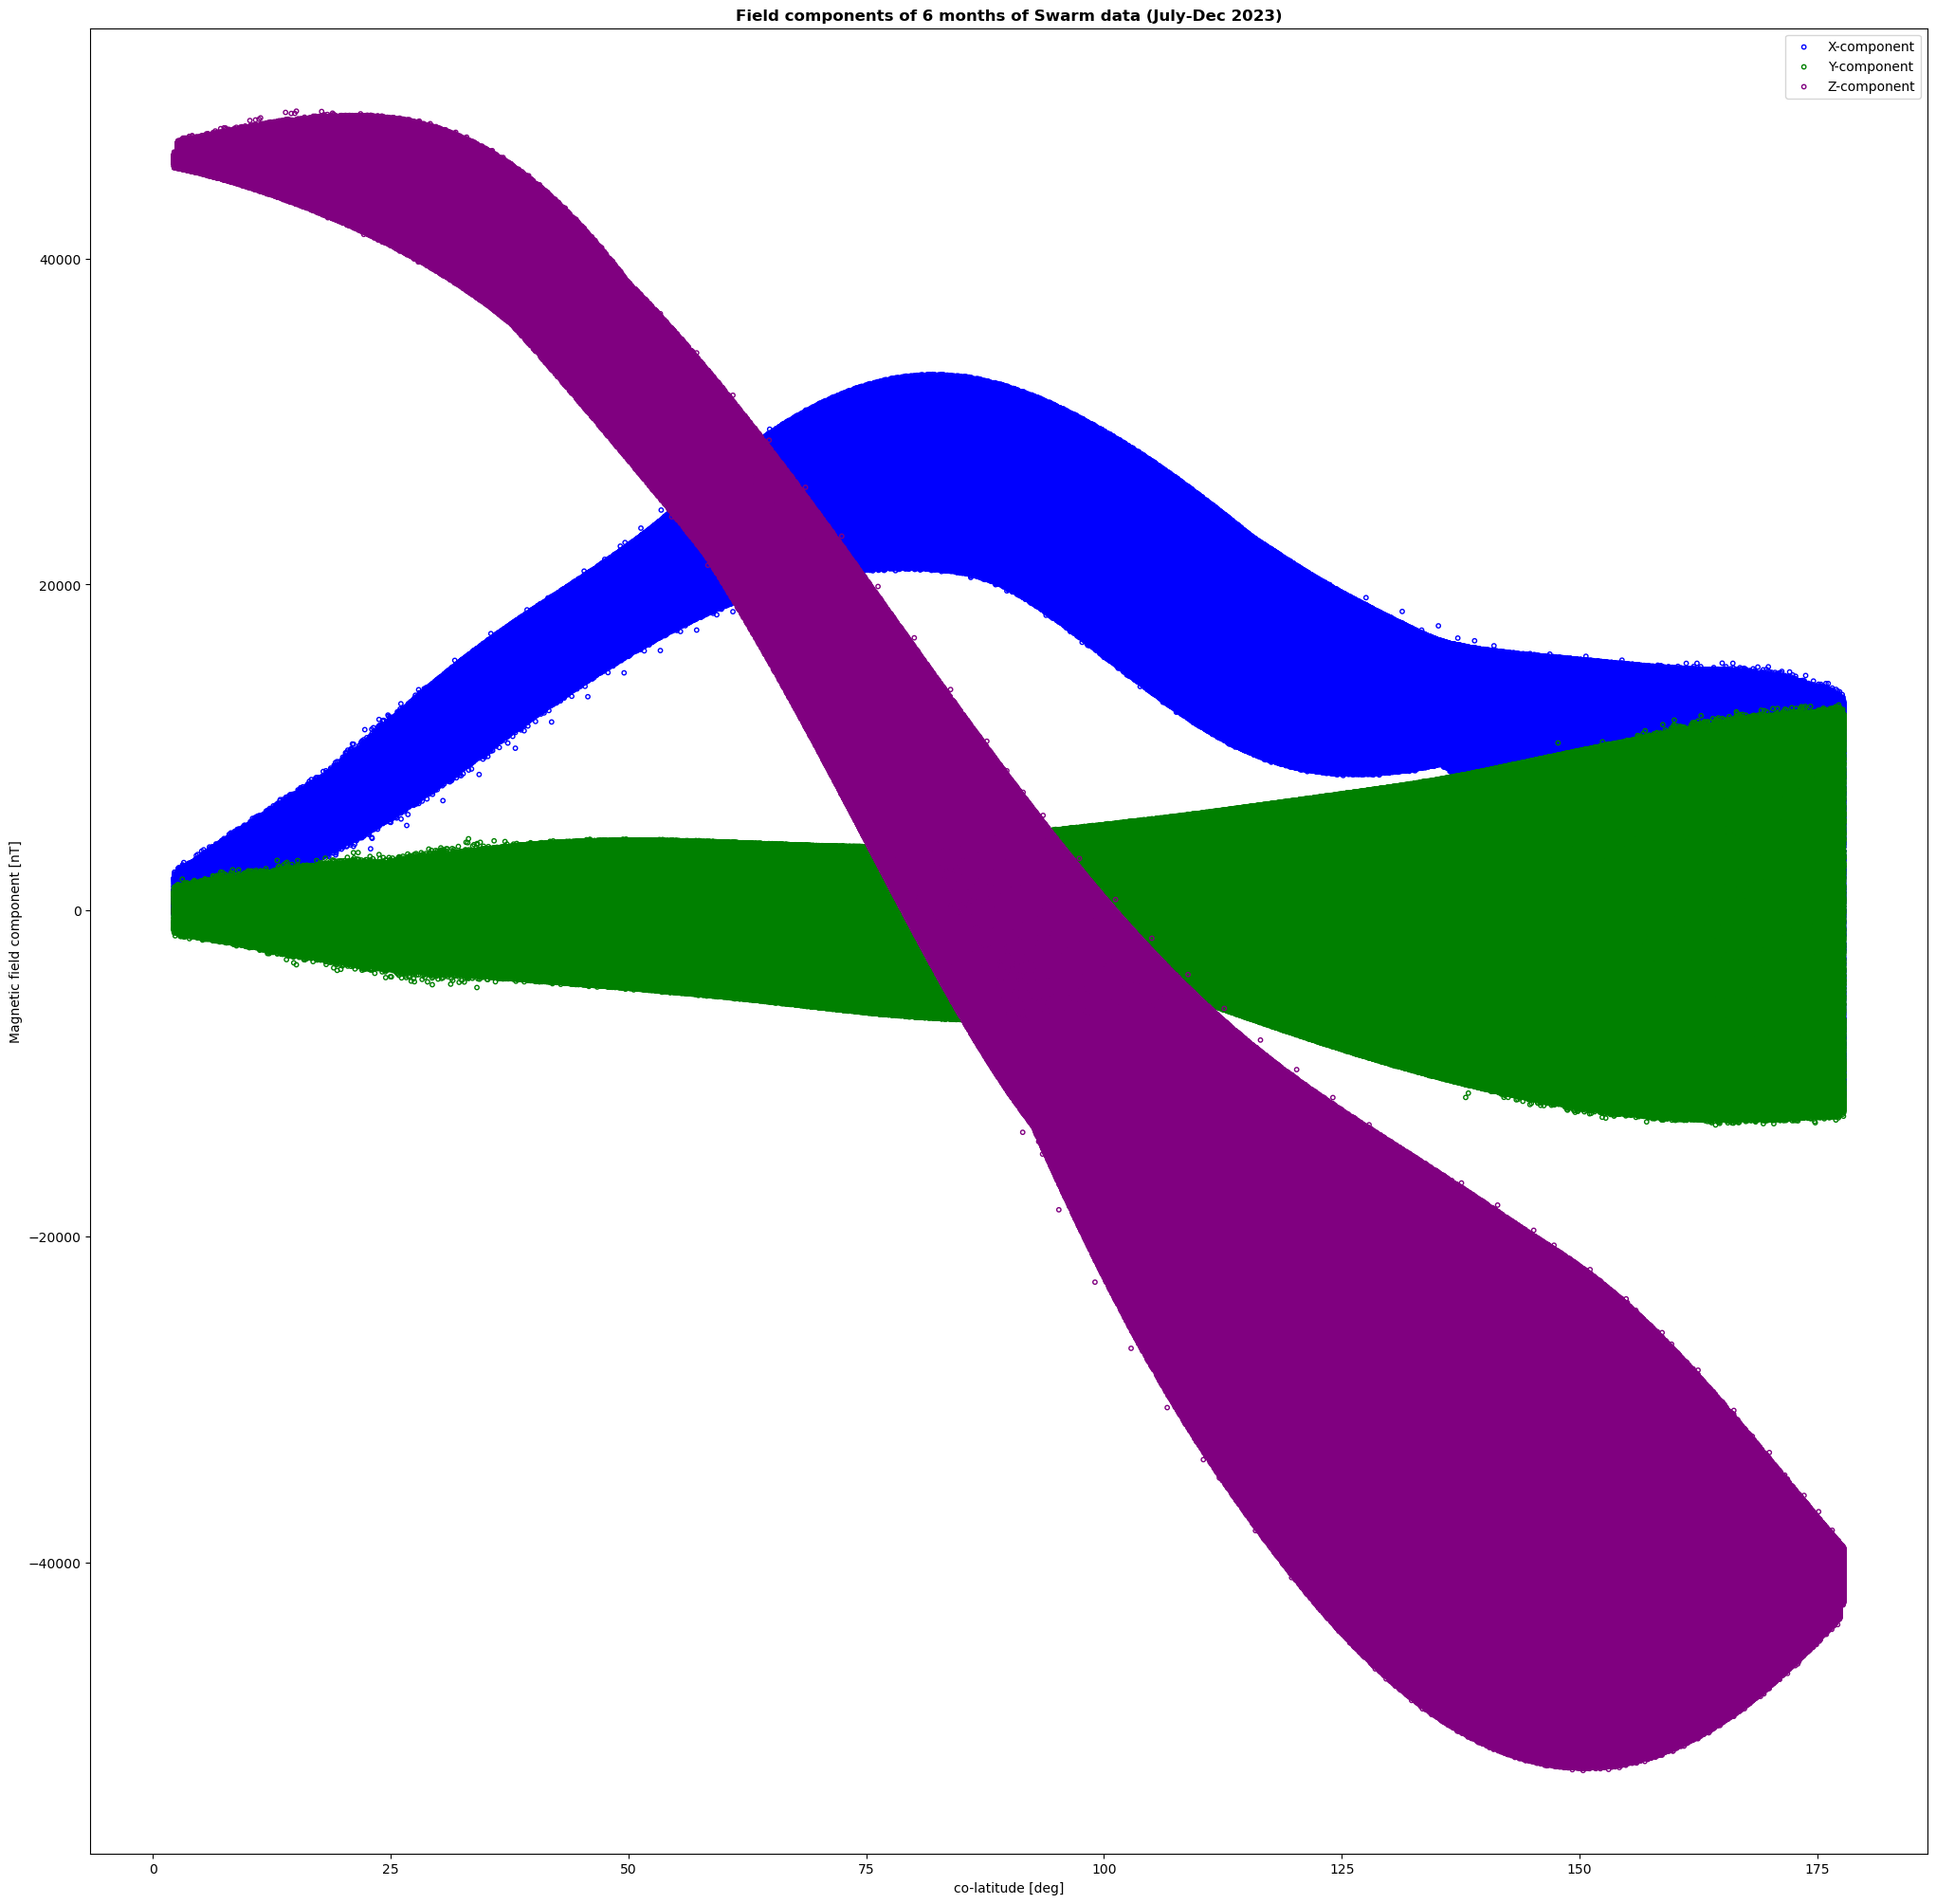

In [7]:
plt.figure(figsize=(25, 25))
plt.scatter(dataframe['colat'].values, dataframe['X'], s = 10, facecolors='none', edgecolors='blue', label = 'X-component')
plt.scatter(dataframe['colat'].values, dataframe['Y'], s = 10, facecolors='none', edgecolors='green', label = 'Y-component')
plt.scatter(dataframe['colat'].values, dataframe['Z'], s = 10, facecolors='none', edgecolors='purple', label = 'Z-component')

plt.ylabel('Magnetic field component [nT]')
plt.xlabel('co-latitude [deg]')
if len(swarm_list) < 6:
    plt.title('Field components of 6 months of Swarm data (July-Dec 2023)', weight = 'bold')
else:
    plt.title('Field components of 12 months of Swarm data (Jan-Dec 2023)', weight = 'bold')
plt.legend()
# plt.savefig('fieldcomponents_colat.png', format='png')
plt.show()

# Dark time selection

In [8]:
# removing sunlit data
rad = np.pi/180
zenith = 90-10  # zenith angle 80 deg

# threshold for dark time observation
cos_zeta_0 = np.cos((zenith) * rad)
_, declination = sun_mjd2000(dataframe.time_stamp.values) # declination of the sun

cos_zeta = []
cos_zeta = ( np.cos(dataframe['colat'].values * rad) * np.sin(declination) \
        + np.sin(dataframe['colat'].values * rad) * np.cos(declination) \
        * np.cos(np.mod(dataframe['time_stamp'].values + .5, 1) * 2*np.pi + dataframe['lon'].values * rad) )

dataframe = dataframe.loc[cos_zeta <= cos_zeta_0].copy()

# dataframe.to_csv('swarm_data/swarmA_sunlit_filtered.txt', index = False, sep = ',')

# Quiet time selection

In [9]:
# Time interval of interest
startdate_whole = timestamp(min(dataframe['time_stamp'].values))
enddate_whole = timestamp(max(dataframe['time_stamp'].values))
startdate = np.datetime64(startdate_whole, 'D') # ensure correct length
enddate = np.datetime64(enddate_whole, 'D')

# Get Dst indices
time_Dst, Dst = np.loadtxt(dst_path, usecols=(0,1), comments='#',unpack=True)

# Put into pandas dataframe for easy access
Dst_indices = pd.DataFrame({'time_Dst': time_Dst, 'Dst': Dst})

# Calculating the hourly difference between all Dst measurements.
Dst_indices['Dst_Hourly_Difference'] = Dst_indices.Dst.diff();

# Interpolating all the Dst hourly difference measurements within the time period of our Swarm data measurements. The Dst measurements span a 1 hour interval, they are interpolated so 1 hourly difference value is assigned to each 1 minute Swarm data measurement.
dataframe['dDst'] = np.abs(np.interp(dataframe.time_stamp.values, Dst_indices.time_Dst.values, Dst_indices.Dst_Hourly_Difference.values));


# Get Hp30 indices
time_Hp30, Hp30, _ = getKpindex(str(startdate), str(enddate), 'Hp30')

# Convert time to mjd2000
stamp = []
for i in np.arange(0, len(time_Hp30)):
    yr1, mn1, dt1 = time_Hp30[i].split("-")
    hr1, min1, _ = time_Hp30[i].split(":")
    stamp.append(to_mjd2000(int(yr1), int(mn1), int(dt1[:2]), int(hr1[-2:]), int(min1)))

Hp30_indices = pd.DataFrame({'time_Hp30': stamp, 'Hp30': Hp30})

# Interpolating all the Hp measurements within the time period of our Swarm data measurements
dataframe['Hp30'] = np.interp(dataframe.time_stamp.values, Hp30_indices.time_Hp30.values, Hp30_indices.Hp30.values);


In [10]:
# Extract data, which is not quiet
dataframe = dataframe.query('Hp30 <= 11/3 & dDst <= 3')

dataframe['F'] = np.sqrt(dataframe['X']**2+dataframe['Y']**2+dataframe['Z']**2)

filtered_data_length = len(dataframe)
print('remaining data points:', filtered_data_length)

remaining data points: 634207


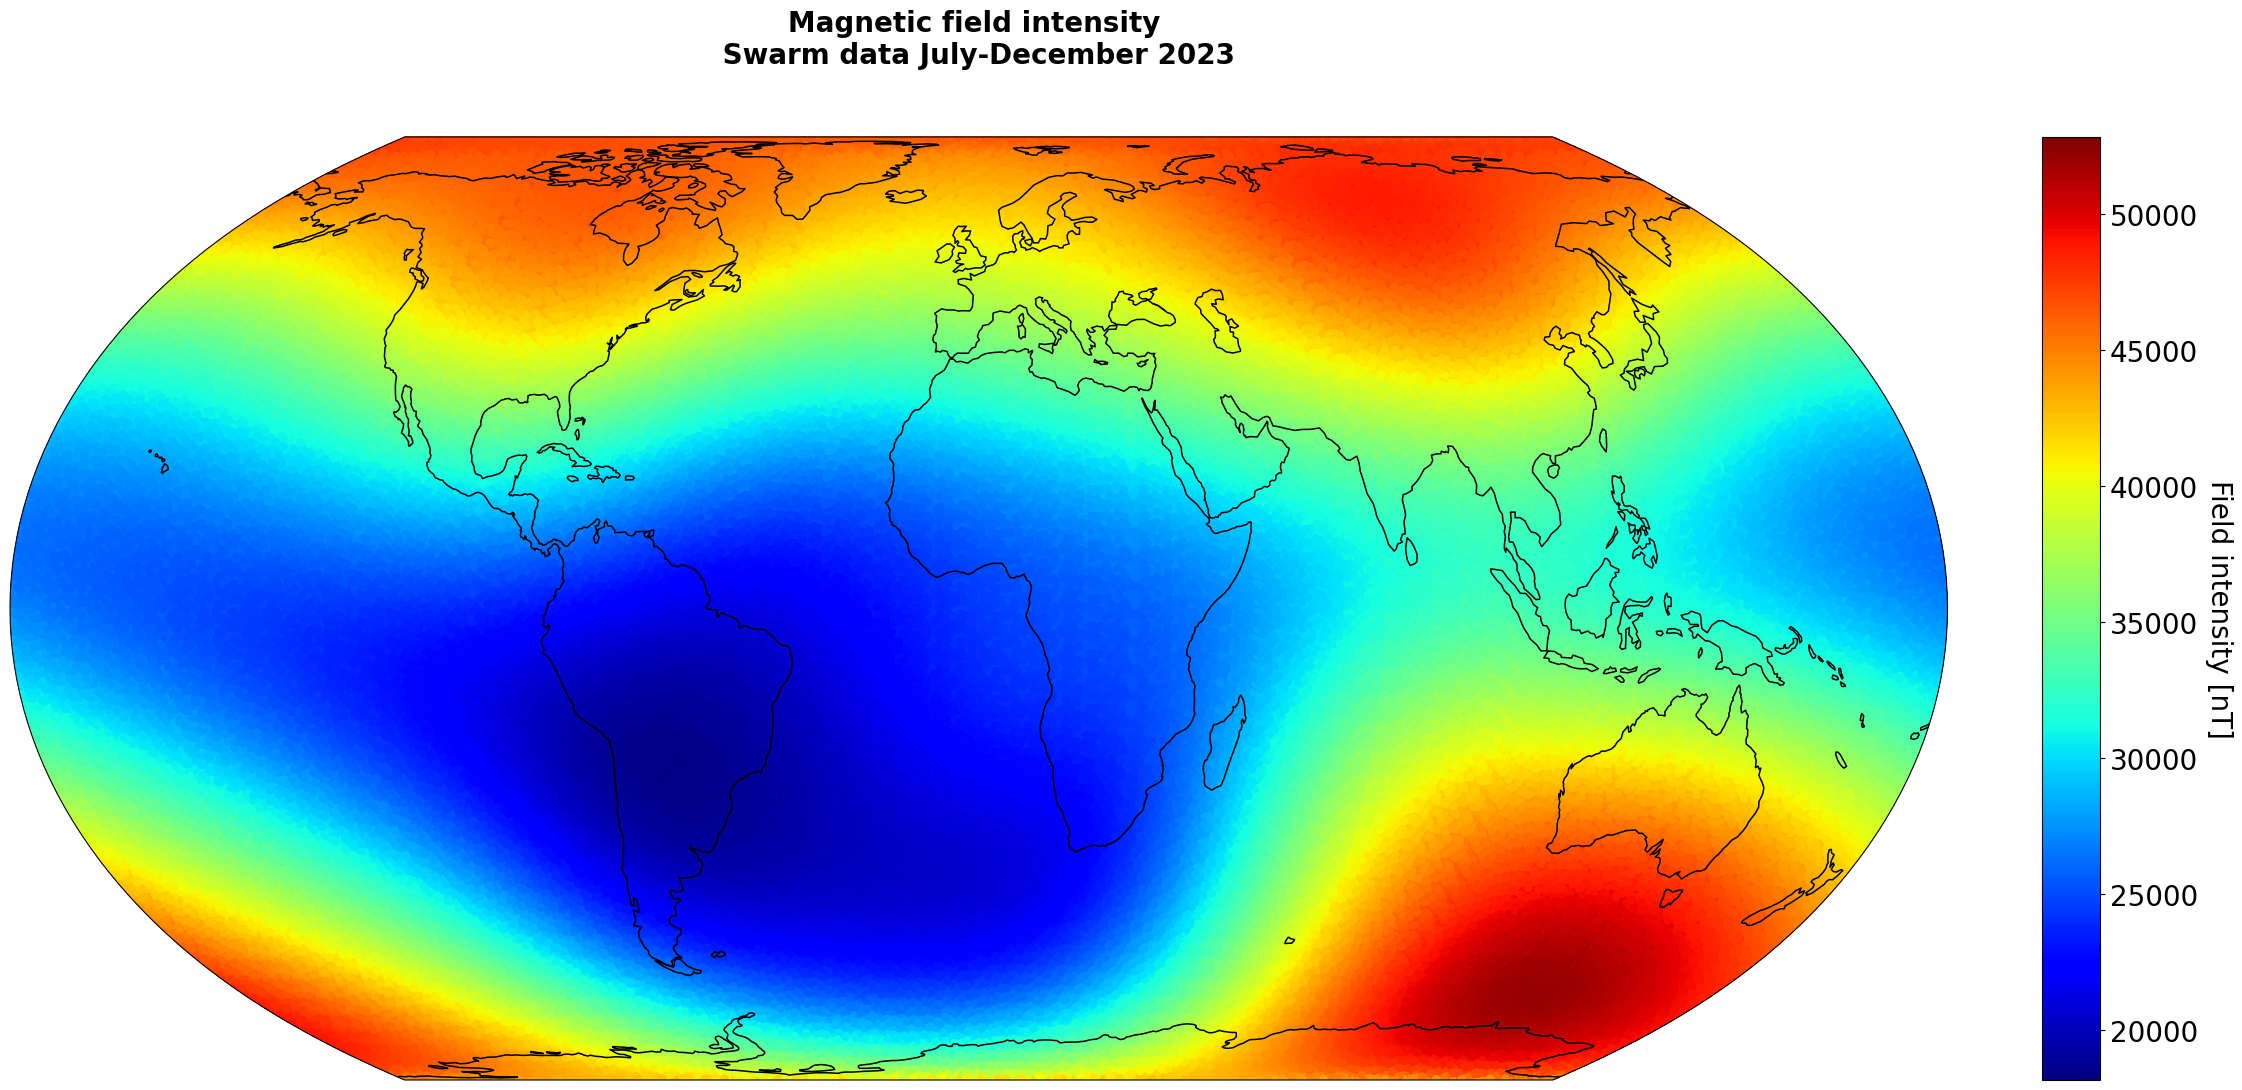

In [50]:
# See if everything looks as expected when plotted on a map
plot_map_one(dataframe['F'], dataframe['lon'], dataframe['colat'], 'swarm', 'Magnetic field intensity', 'Field intensity [nT]', scatter_size = 40)



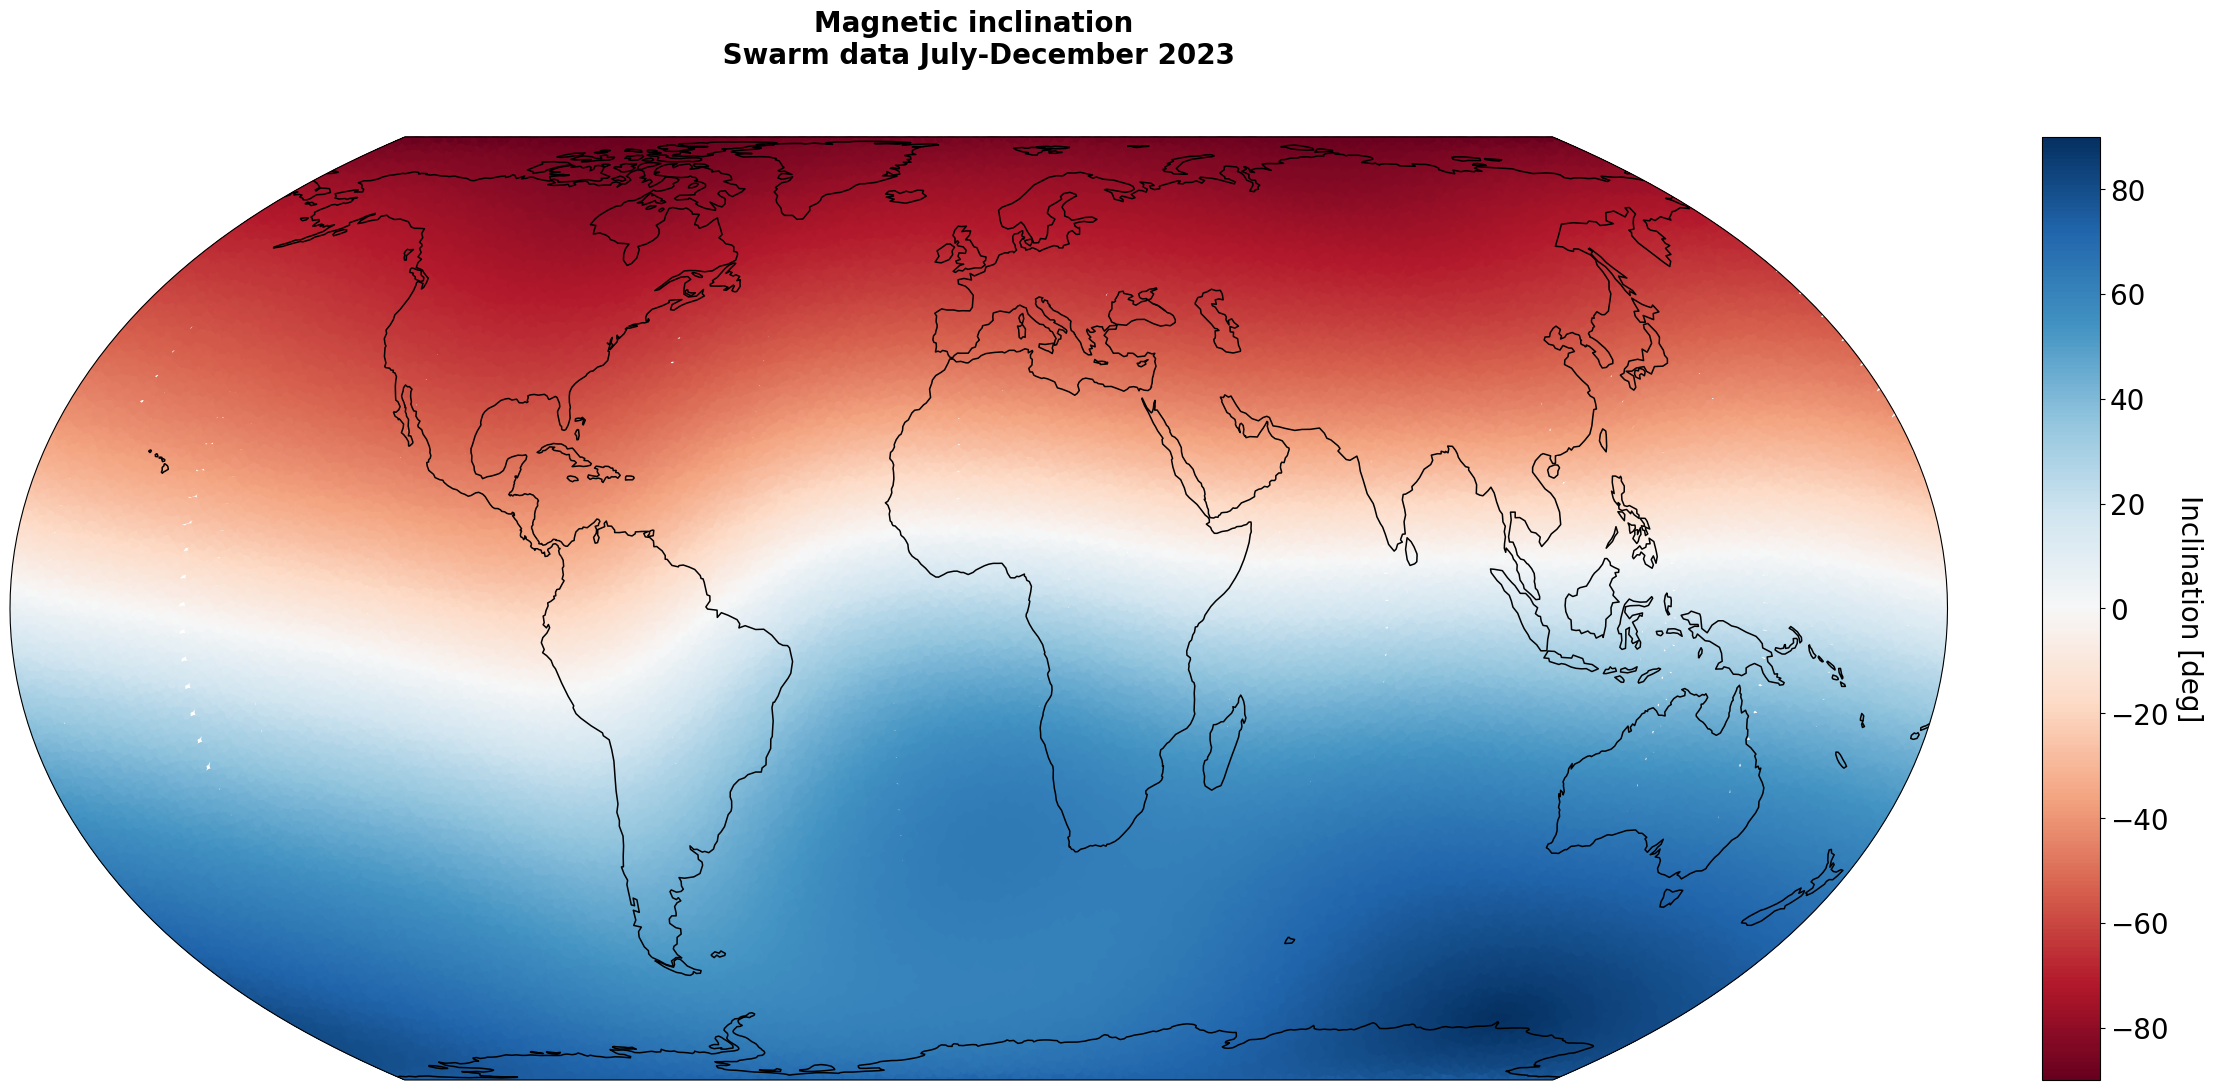

In [12]:
# Magnetic inclination

H = np.sqrt(dataframe['X']**2 + dataframe['Y']**2) # H = sqrt(X^2 + Y^2)
I = np.arctan(-dataframe['Z']/H)*180/np.pi


plot_map_one(I, dataframe['lon'], dataframe['colat'], 'swarm', 'Magnetic inclination', 'Inclination [deg]', scatter_size = 40, colors = 'RdBu')

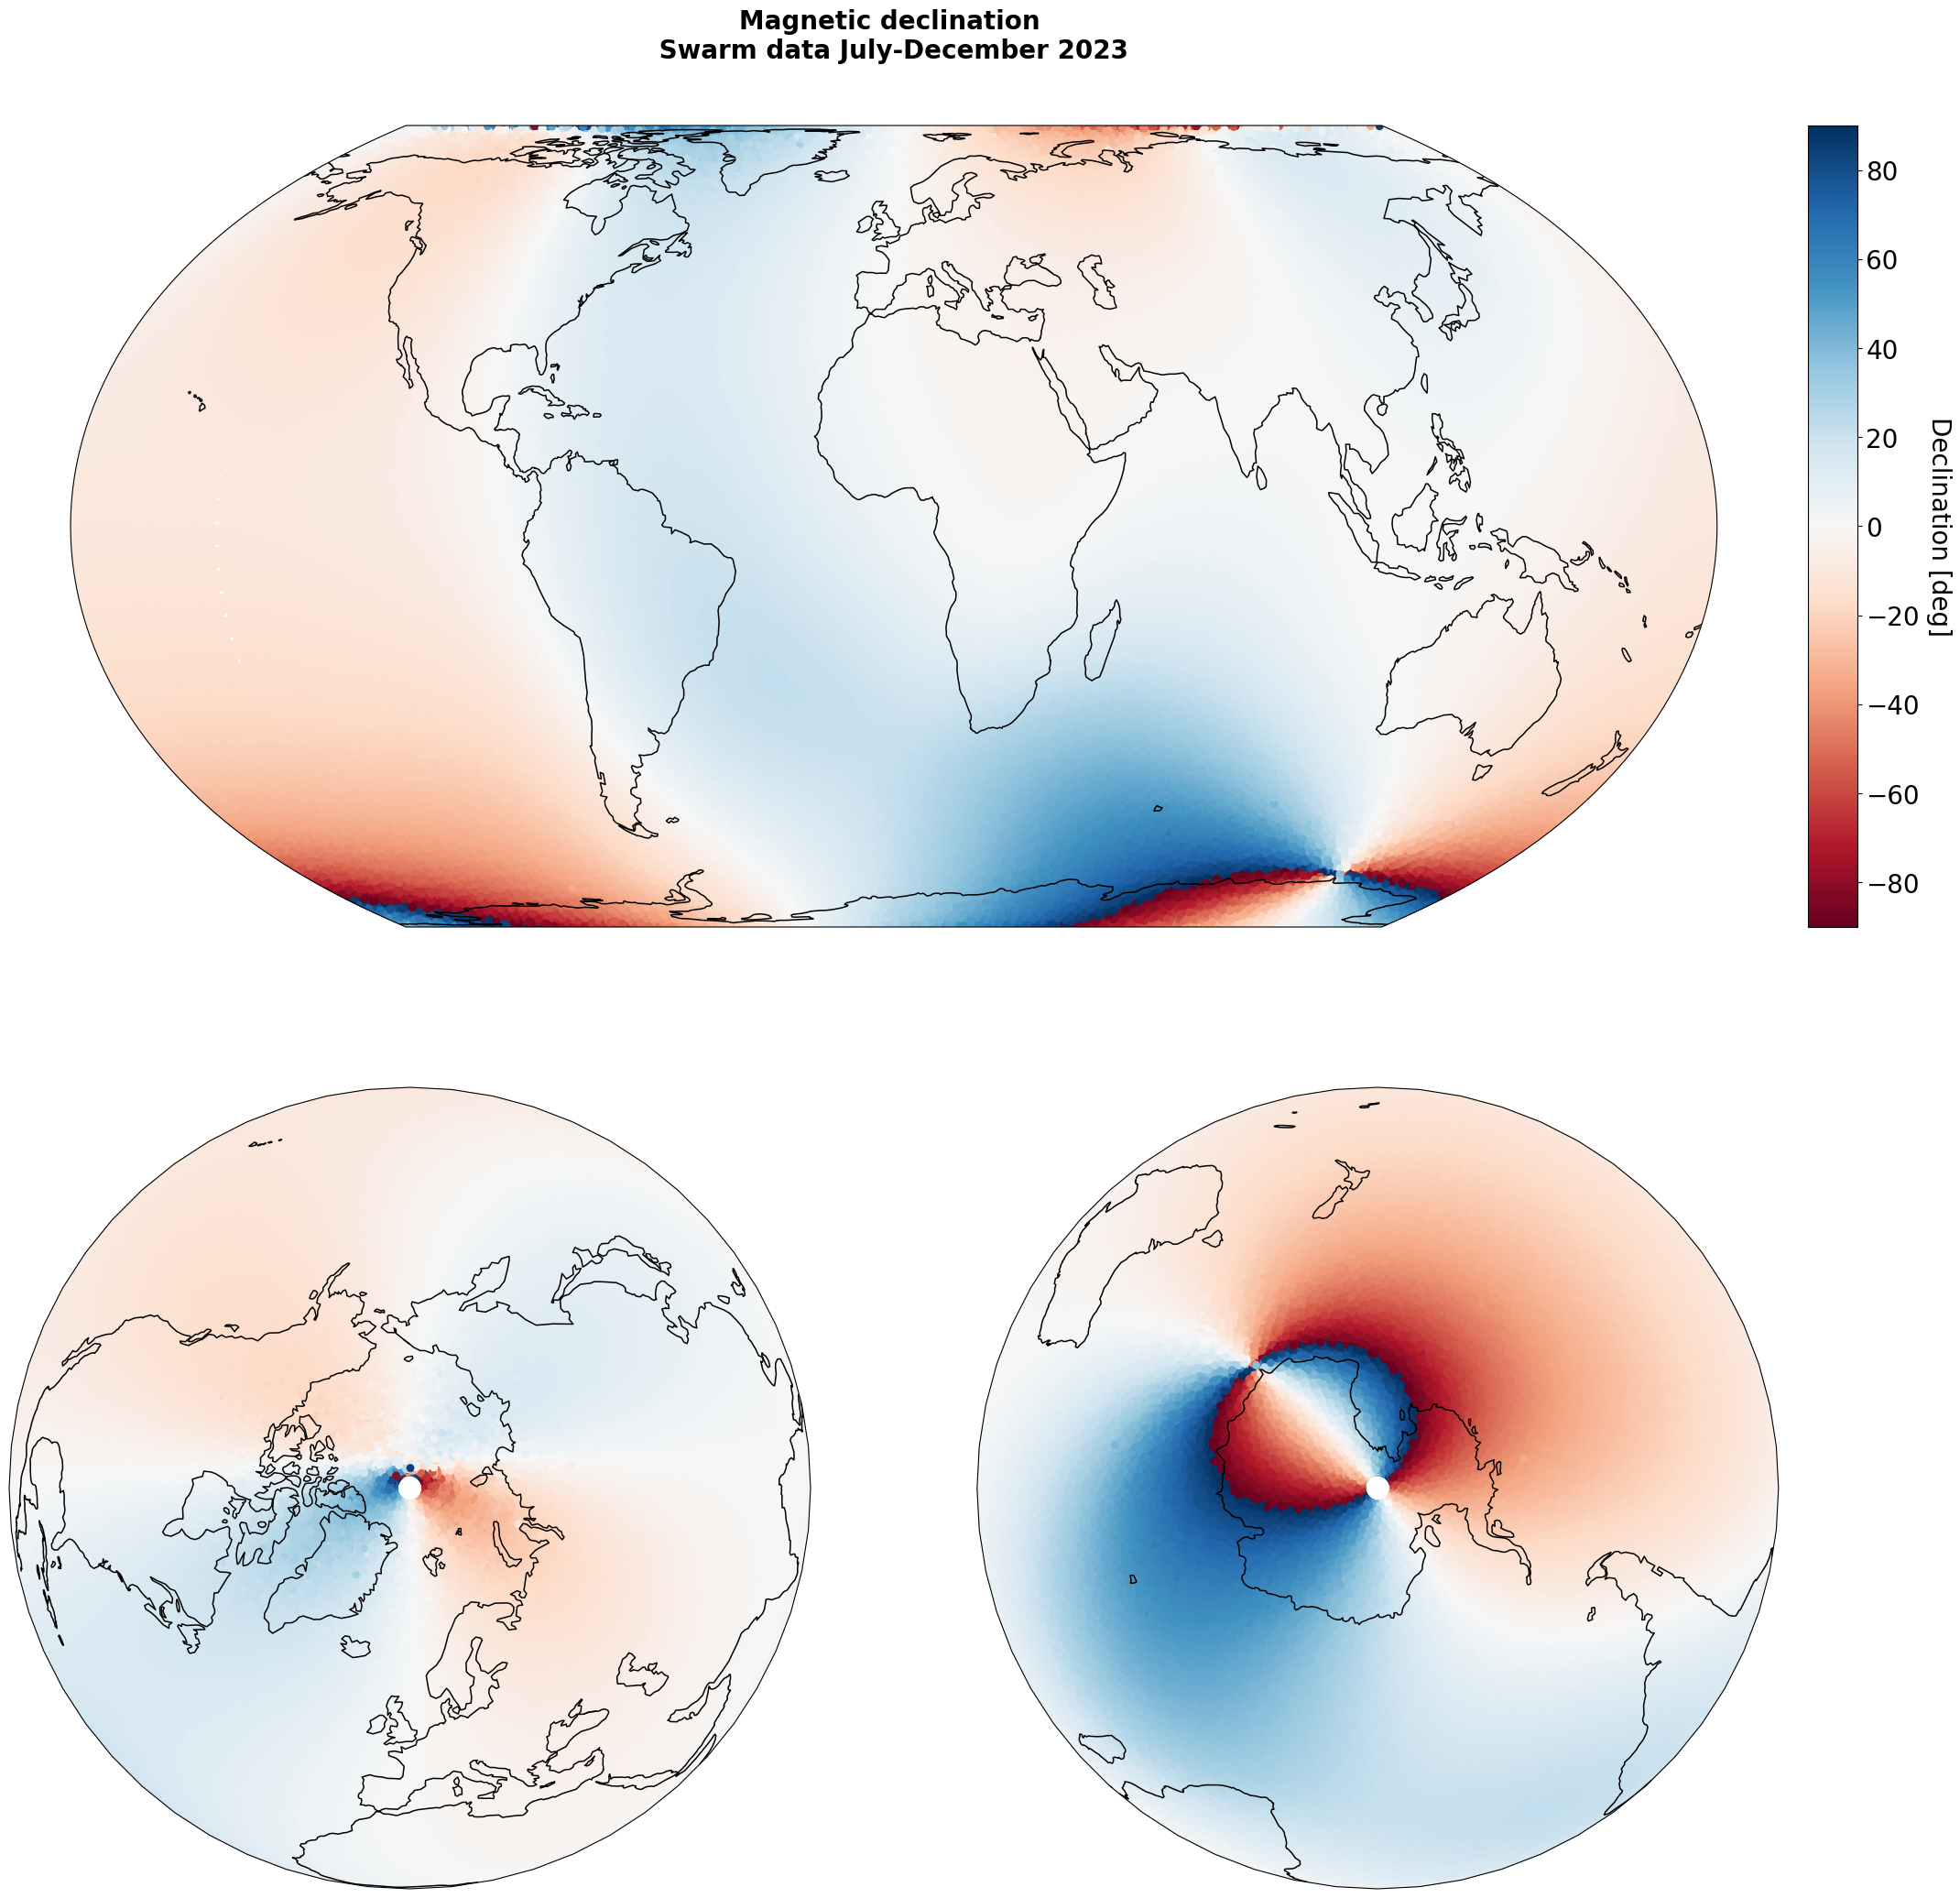

In [13]:
D = np.arctan(dataframe['Y']/(-dataframe['X']))*180/np.pi


plot_map_three(D, dataframe['lon'], dataframe['colat'], 'swarm', 'Magnetic declination', 'Declination [deg]', scatter_size = 40, colors = 'RdBu')

In [51]:
dataframe['B_radius'] = -dataframe['Z'];
dataframe['B_theta'] = -dataframe['X'];
dataframe['B_phi'] = dataframe['Y'];

dataframe.to_csv('ready_swarm_data/swarmALL_dark_quiet.txt', index = False, sep = ',')